C:\Users\study\AppData\Local\Temp\ipykernel_10176\4277296059.py:24: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(ideal_adc, error, deg)


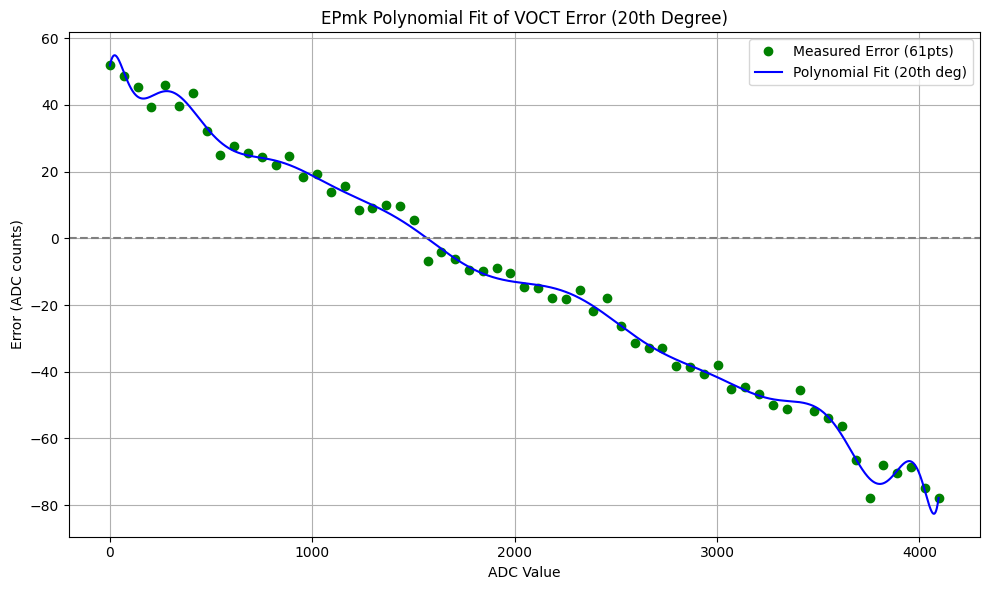


// EPmk VOCT用誤差補正 LUT（20次多項式フィット, int16_t）
const int16_t VOCTInputErrorLUT[4096] = {
52,52,52,53,53,53,53,54,54,54,54,54,54,54,55,55,
55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,
55,55,54,54,54,54,54,54,54,54,54,54,53,53,53,53,
53,53,53,53,52,52,52,52,52,52,51,51,51,51,51,51,
51,50,50,50,50,50,50,49,49,49,49,49,49,49,48,48,
48,48,48,48,48,47,47,47,47,47,47,47,46,46,46,46,
46,46,46,46,45,45,45,45,45,45,45,45,45,44,44,44,
44,44,44,44,44,44,44,44,43,43,43,43,43,43,43,43,
43,43,43,43,43,43,43,43,43,42,42,42,42,42,42,42,
42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,
42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,
42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,
42,42,42,42,42,42,42,42,42,43,43,43,43,43,43,43,
43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,
43,43,43,43,43,43,43,43,43,43,43,43,44,44,44,44,
44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,
44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,
44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,
44,44,44,44,44,44,44,44,44,44,44

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 実測データ（セミトーン0〜60）
semitones = np.arange(61)
measured = np.array([
52,117,182,244,319,381,453,510,571,642,
708,775,841,912,974,1043,1106,1176,1237,
1306,1375,1443,1507,1563,1634,1700,1765,
1833,1902,1969,2033,2101,2166,2234,2305,
2367,2439,2499,2562,2629,2697,2760,2828,
2894,2965,3026,3095,3161,3226,3293,3367,
3429,3495,3561,3619,3676,3754,3820,3890,3952,4017,
])

# 理想値（12bit ADCスケールでセミトーンを4095に割り当て）
ideal_adc = (semitones / 60) * 4095
error = measured - ideal_adc
# print(ideal_adc)
# ----------------------------
# 多項式で誤差をフィット（n次）
# ----------------------------
deg = 20
coeffs = np.polyfit(ideal_adc, error, deg)
poly = np.poly1d(coeffs)

# ADC範囲に対して誤差補正値を計算
adc_values = np.arange(4096)
poly_error = poly(adc_values)
smoothed_error = np.round(poly_error).astype(int)

# ----------------------------
# グラフ表示
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(ideal_adc, error, 'go', label='Measured Error (61pts)')
plt.plot(adc_values, poly_error, 'b-', label=f'Polynomial Fit ({deg}th deg)')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"EPmk Polynomial Fit of VOCT Error ({deg}th Degree)")
plt.xlabel("ADC Value")
plt.ylabel("Error (ADC counts)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# C配列として出力
# ----------------------------
print(f"\n// EPmk VOCT用誤差補正 LUT（{deg}次多項式フィット, int16_t）")
print("const int16_t VOCTInputErrorLUT[4096] = {")
for i, val in enumerate(smoothed_error):
    sep = "," if i < 4095 else ""
    lineend = "\n" if i % 16 == 15 or i == 4095 else ""
    print(f"{val:2d}", end=sep + lineend)
print("};")

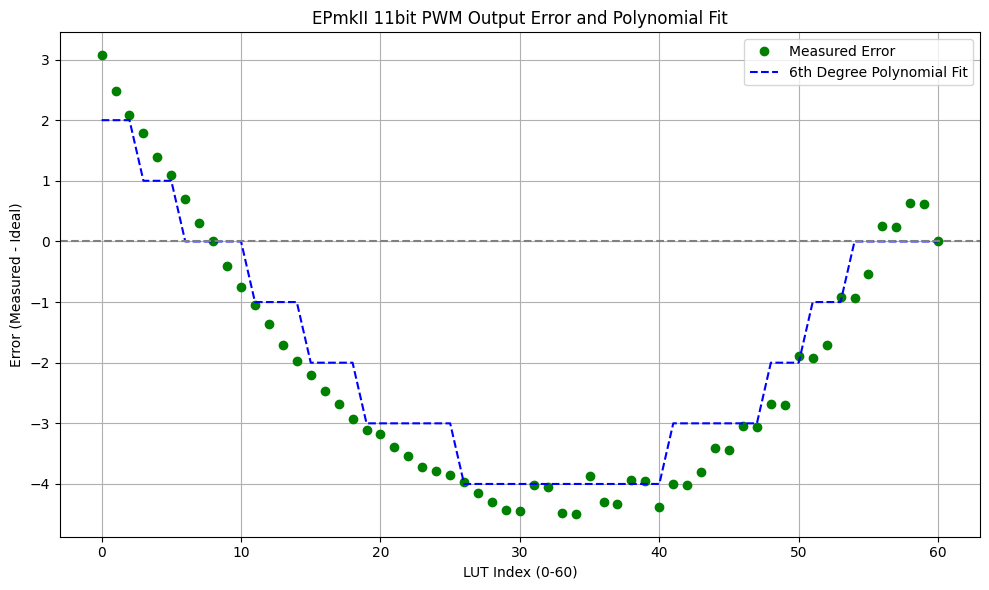


// EPmkII 11bit PWM DC出力誤差補正 LUT（8次多項式フィット, int16_t）
const int16_t PWMCVDCOutputErrorLUT[61] = {
 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
 0,-1,-1,-1,-1,-2,-2,-2,-2,-3,
-3,-3,-3,-3,-3,-3,-4,-4,-4,-4,
-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,
-4,-3,-3,-3,-3,-3,-3,-3,-2,-2,
-2,-1,-1,-1, 0, 0, 0, 0, 0, 0,
 0
};


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 実測データ（0〜2047のPWM → フィルタ出力電圧0-5000mV）
measured = np.array([
7.5,89.1,171.2,253.5,335.6,417.9,500,582.1,664.4,748.9,831.1,
913.4,995.7,1077.9,1160.3,1242.8,1325.2,1407.7,1492.6,1575.2,
1658.1,1740.6,1823.3,1905.9,1988.8,2071.7,2156.9,2239.5,2322.2,
2404.9,2487.9,2572,2655,2737,2820,2907,2989,3072,3156,3239,3321,
3405,3488,3574,3658,3741,3825,3908,3992,4075,4160,4243,4329,4414,
4497,4581,4666,4749,4833,4916,5000,
])

# 11bit値に変換
mv_to_11bit_ratio = 2047.0 / 5000.0
measured = measured * mv_to_11bit_ratio

# LUTインデックス（0〜60）
index = np.arange(61)

# 理想値（0〜2047を直線的に割ったもの）
ideal = np.linspace(0, 2047, 61).astype(int)

# 誤差
error = measured - ideal

# 多項式フィッティング（例：6次）
coeffs = np.polyfit(index, error, deg=8)
poly = np.poly1d(coeffs)

# LUT誤差補正値
poly_error = poly(index).astype(int)

# ----------------------------
# グラフ表示
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(index, error, 'go', label='Measured Error')
plt.plot(index, poly_error, 'b--', label='6th Degree Polynomial Fit')
plt.axhline(0, color='gray', linestyle='--')
plt.title("EPmkII 11bit PWM Output Error and Polynomial Fit")
plt.xlabel("LUT Index (0-60)")
plt.ylabel("Error (Measured - Ideal)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# C配列として出力
# ----------------------------
print("\n// EPmkII 11bit PWM DC出力誤差補正 LUT（8次多項式フィット, int16_t）")
print("const int16_t PWMCVDCOutputErrorLUT[61] = {")
for i, val in enumerate(poly_error):
    sep = "," if i < 60 else ""
    lineend = "\n" if i % 10 == 9 or i == 60 else ""
    print(f"{val:2d}", end=sep + lineend)
print("};")
